In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as stats

In [196]:
csv_path = Path("Resources/Tiktok_songs_2022.csv")

Tiktok_df = pd.read_csv(csv_path, encoding = "utf-8", index_col = False)

reduced_Tiktok_df = Tiktok_df[["track_name", "artist_name", "artist_pop", "track_pop", "danceability"]]

reduced_Tiktok_df.head()

#reduced_Tiktok_df.to_csv("Resources/reduced_Tiktok.csv", encoding= "utf-8", index= False, header= True)

,track_name,artist_name,artist_pop,track_pop,danceability
0,Running Up That Hill (A Deal With God),Kate Bush,81,95,0.629
1,As It Was,Harry Styles,91,96,0.520
2,Sunroof,Nicky Youre,73,44,0.768
3,Heat Waves,Glass Animals,80,89,0.761
4,About Damn Time,Lizzo,81,92,0.836


In [235]:
csv_path_2 = Path("Resources/spotify_top_charts_22.csv")

top_charts_df = pd.read_csv(csv_path_2, encoding = "utf-8", index_col = False)

reduced_top_charts_df = top_charts_df[["artist_names", "track_name", "peak_rank"]]

reduced_top_charts_df.head()

#reduced_top_charts_df.to_csv("Resources/reduced_top_charts.csv", encoding= "utf-8", index= False, header= True)

,artist_names,track_name,peak_rank
0,Glass Animals,Heat Waves,1
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1
2,Anitta,Envolver,3
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3
4,GAYLE,abcdefu,1


In [236]:
Tiktok_top_charts_df = pd.merge(reduced_top_charts_df, reduced_Tiktok_df, on = "track_name")

Tiktok_top_charts_df.drop('artist_name', axis = 1, inplace= True)

Tiktok_top_charts_df

,artist_names,track_name,peak_rank,artist_pop,track_pop,danceability
0,Glass Animals,Heat Waves,1,80,89,0.761
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,83,89,0.591
2,Anitta,Envolver,3,80,86,0.812
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,88,87,0.728
4,GAYLE,abcdefu,1,71,87,0.695
...,...,...,...,...,...,...
81,Harry Styles,Falling,29,66,15,0.785
82,"Sofía Reyes, Jason Derulo, De La Ghetto","1, 2, 3 (feat. Jason Derulo & De La Ghetto)",31,72,82,0.792
83,Labrinth,Forever,185,46,51,0.750
84,Labrinth,Forever,185,46,54,0.753


In [244]:
Tiktok_top_charts_sorted_df = Tiktok_top_charts_df.sort_values(by = ["peak_rank", "track_name"], ascending = [True, True])

Tiktok_top_charts_sorted_df = Tiktok_top_charts_sorted_df.drop_duplicates(subset="artist_names")

Tiktok_top_charts_sorted_df

,artist_names,track_name,peak_rank,artist_pop,track_pop,danceability
52,Harry Styles,As It Was,1,91,96,0.520
30,Måneskin,Beggin',1,78,86,0.714
16,The Weeknd,Blinding Lights,1,93,90,0.514
28,"Bad Bunny, Jhay Cortez",DÁKITI,1,48,47,0.726
55,Joji,Glimpse of Us,1,85,97,0.440
...,...,...,...,...,...,...
42,"Maroon 5, Wiz Khalifa",Payphone,136,43,45,0.721
43,WILLOW,Wait a Minute!,138,76,86,0.764
66,LF SYSTEM,Afraid To Feel,150,68,86,0.578
83,Labrinth,Forever,185,46,51,0.750


In [245]:
Tiktok_top_charts_sorted_df.loc[(Tiktok_top_charts_sorted_df["peak_rank"] < 51)]

#Tiktok_top_charts_sorted_df[:5]

,artist_names,track_name,peak_rank,artist_pop,track_pop,danceability
52,Harry Styles,As It Was,1,91,96,0.520
30,Måneskin,Beggin',1,78,86,0.714
16,The Weeknd,Blinding Lights,1,93,90,0.514
28,"Bad Bunny, Jhay Cortez",DÁKITI,1,48,47,0.726
55,Joji,Glimpse of Us,1,85,97,0.440
...,...,...,...,...,...,...
26,Eminem,Without Me,31,83,77,0.752
45,"NEIKED, Mae Muller, Polo G",Better Days (NEIKED x Mae Muller x Polo G),32,68,83,0.717
21,Ruth B.,Dandelions,35,75,90,0.609
49,Bruno Mars,Talking to the Moon,45,86,76,0.498


<Axes: xlabel='track_pop', ylabel='artist_pop'>

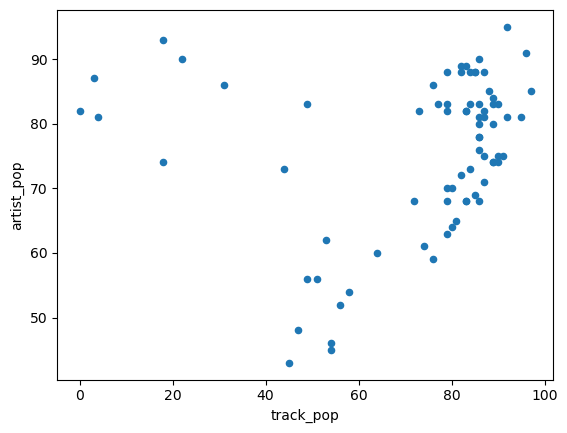

In [240]:
Tiktok_top_charts_sorted_df.plot.scatter( x = 'track_pop', y = 'artist_pop')

<Axes: xlabel='track_pop', ylabel='danceability'>

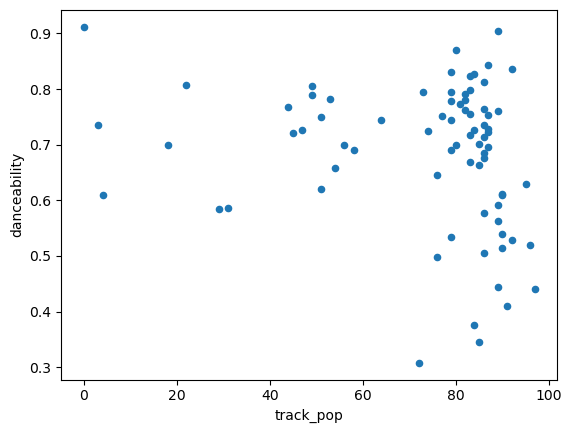

In [220]:
Tiktok_top_charts_sorted_df.plot.scatter( x = 'track_pop', y = 'danceability')

In [241]:
artist_popularity = Tiktok_top_charts_sorted_df.loc[:, ['artist_names', 'artist_pop', 'danceability']].sort_values('artist_pop', ascending = False)

artist_popularity[:5]

,artist_names,artist_pop,danceability
60,"Drake, 21 Savage",95,0.529
17,The Weeknd,93,0.513
52,Harry Styles,91,0.520
35,"Justin Bieber, Daniel Caesar, Giveon",90,0.677
12,Ed Sheeran,90,0.808


In [246]:
tik_tok_song_popularity = Tiktok_top_charts_sorted_df.loc[:, ['track_name', 'artist_names', 'track_pop', 'danceability', 'peak_rank']].sort_values(['track_pop', 'peak_rank'], ascending = [False, True])

new_tik_tok_song_popularity_df = tik_tok_song_popularity[:20]

new_tik_tok_song_popularity_df

,track_name,artist_names,track_pop,danceability,peak_rank
55,Glimpse of Us,Joji,97,0.440,1
52,As It Was,Harry Styles,96,0.520,1
54,Running Up That Hill (A Deal With God),Kate Bush,95,0.629,1
60,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",92,0.529,7
57,About Damn Time,Lizzo,92,0.836,9
10,MIDDLE OF THE NIGHT,Elley Duhé,91,0.410,14
16,Blinding Lights,The Weeknd,90,0.514,1
19,Sweater Weather,The Neighbourhood,90,0.612,29
62,Until I Found You,Stephen Sanchez,90,0.539,30
21,Dandelions,Ruth B.,90,0.609,35


<Axes: xlabel='track_name'>

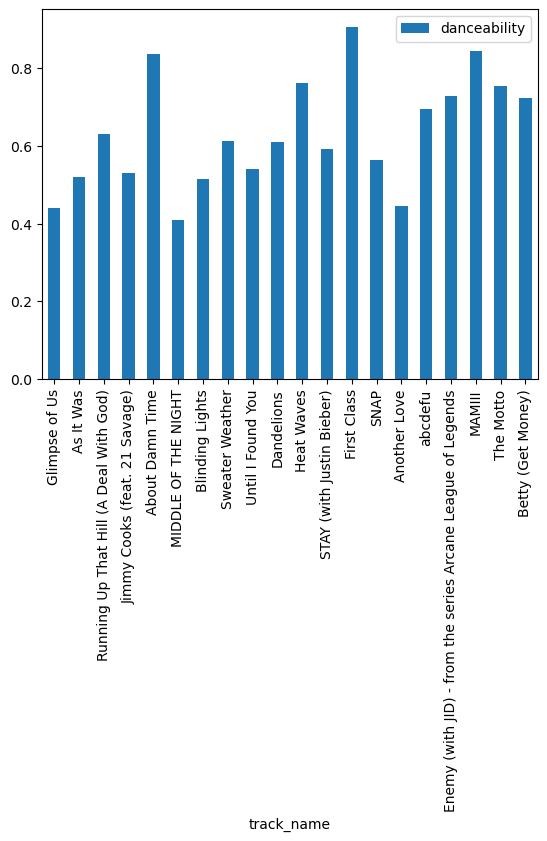

In [234]:
new_tik_tok_song_popularity_df.plot.bar(x = 'track_name', y = 'danceability')